In [82]:
# Import Important Libraries
import sklearn
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.neural_network import MLPClassifier
import math
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# read the csv file
df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [84]:
# preprocessing

# print(df['WindGustDir'].value_counts())

df = df.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

# print(df.info)

# for the columns with NaN values replace them with the mean
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(value = df[col].mean(), inplace = True)

# print(df.info)

In [85]:
# replace yes and no with 0 or 1 and drop all rows which contain a null value.
df.RainToday.replace(('Yes', 'No'), (1, 0), inplace=True)
df.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)
df = df[df['RainToday'].notna()]
df = df[df['RainTomorrow'].notna()]
# print(df.info())
# print(df.isna().sum())

<AxesSubplot:>

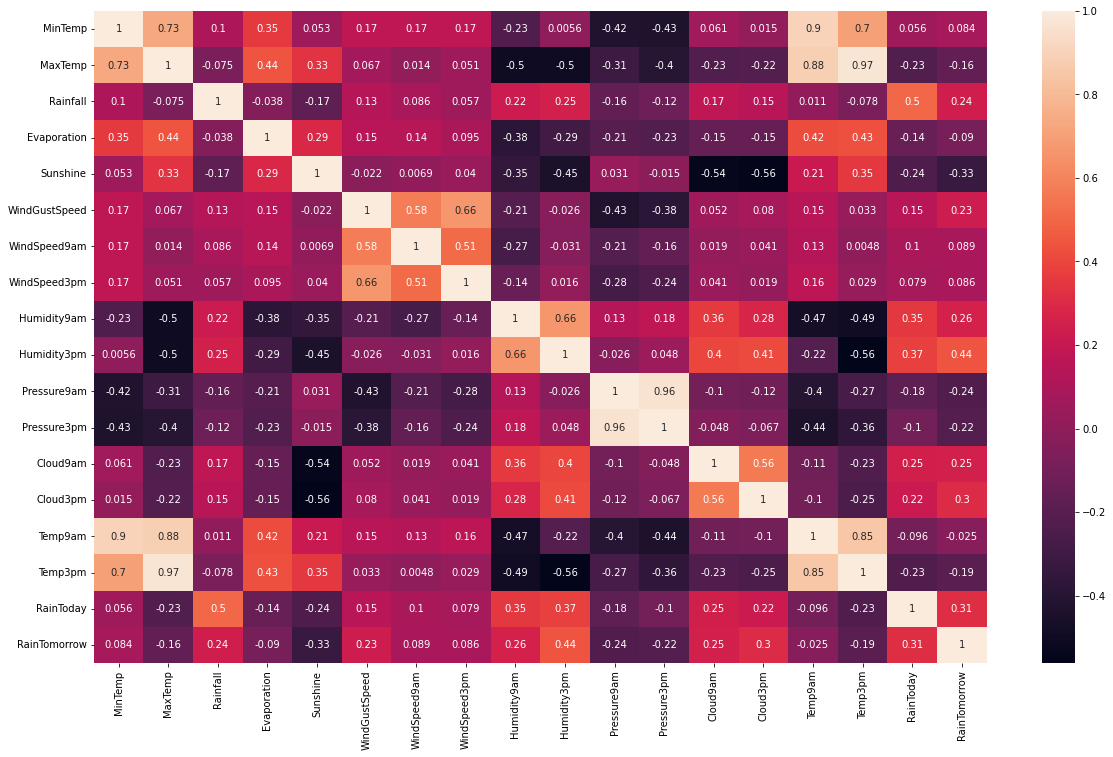

In [86]:
cor = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(cor, annot = True)

In [87]:
related = cor['RainTomorrow'].sort_values(ascending = False)
print(related)

RainTomorrow     1.000000
Humidity3pm      0.441541
RainToday        0.313097
Cloud3pm         0.303381
Humidity9am      0.256052
Cloud9am         0.254208
Rainfall         0.239032
WindGustSpeed    0.225622
WindSpeed9am     0.089463
WindSpeed3pm     0.085906
MinTemp          0.084179
Temp9am         -0.025371
Evaporation     -0.089966
MaxTemp         -0.159269
Temp3pm         -0.190702
Pressure3pm     -0.216805
Pressure9am     -0.235940
Sunshine        -0.328782
Name: RainTomorrow, dtype: float64


In [88]:
X = df.drop(columns = ['RainTomorrow']).to_numpy()
y = df['RainTomorrow'].to_numpy()
X.shape

(140787, 17)

In [89]:
X_scale = preprocessing.scale(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, random_state=42)
X_train.shape
X_test.shape

(35197, 17)

In [91]:
def run_neural_network(Activation, Solver, Alpha):
    mlp = MLPClassifier(hidden_layer_sizes = (10), activation=Activation, solver=Solver, alpha = Alpha, learning_rate_init = 0.01, max_iter=2000)
    mlp.fit(X_train,y_train)
    predict_test = mlp.predict(X_test)
    acc_training = mlp.score(X_train, y_train)
    acc_testing = metrics.accuracy_score(y_test, predict_test)
    return acc_training, acc_testing

In [92]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10]
high_accuracy = 0
vals = None
train_accuracy_relu, test_accuracy_relu = [], []
for alpha in alphas:
    train, test = run_neural_network("relu", "sgd", alpha)
    train_accuracy_relu.append(train)
    test_accuracy_relu.append(test)
    if test > high_accuracy:
        high_accuracy = test
        vals = ["relu", alpha]

In [93]:

train_accuracy_sigmoid, test_accuracy_sigmoid = [], []
for alpha in alphas:
    train, test = run_neural_network("logistic", "sgd", alpha)
    train_accuracy_sigmoid.append(train)
    test_accuracy_sigmoid.append(test)
    if test > high_accuracy:
        high_accuracy = test
        vals = ["logistic", alpha]

In [94]:
train_accuracy_tanh, test_accuracy_tanh = [], []
for alpha in alphas:
    train, test = run_neural_network("tanh", "sgd", alpha)
    train_accuracy_tanh.append(train)
    test_accuracy_tanh.append(test)
    if test > high_accuracy:
        high_accuracy = test
        vals = ["tanh", alpha]

In [95]:
print(high_accuracy, vals)

0.8506975026280649 ['tanh', 0.1]


Text(0, 0.5, 'Accuracy')

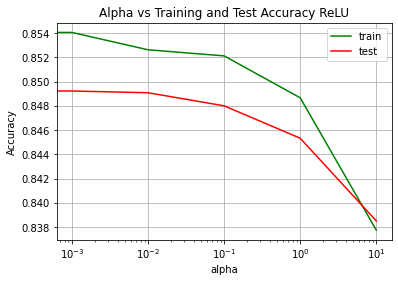

In [107]:
plt.plot(alphas, train_accuracy_relu, color = 'g', label = 'train')
plt.plot(alphas, test_accuracy_relu, color = 'r', label = 'test')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('Alpha vs Training and Test Accuracy ReLU')
plt.xlabel('alpha')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

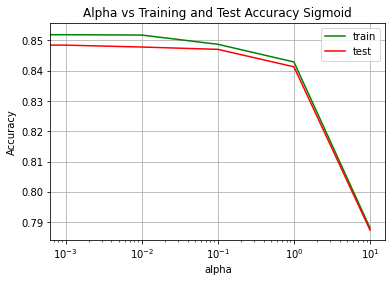

In [108]:
plt.plot(alphas, train_accuracy_sigmoid, color = 'g', label = 'train')
plt.plot(alphas, test_accuracy_sigmoid, color = 'r', label = 'test')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('Alpha vs Training and Test Accuracy Sigmoid')
plt.xlabel('alpha')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

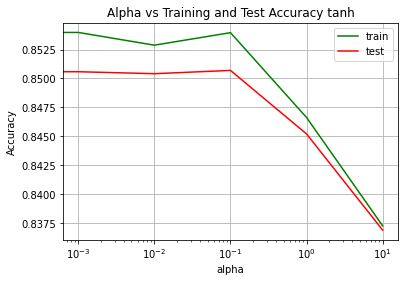

In [109]:
plt.plot(alphas, train_accuracy_tanh, color = 'g', label = 'train')
plt.plot(alphas, test_accuracy_tanh, color = 'r', label = 'test')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.title('Alpha vs Training and Test Accuracy tanh')
plt.xlabel('alpha')
plt.ylabel('Accuracy')

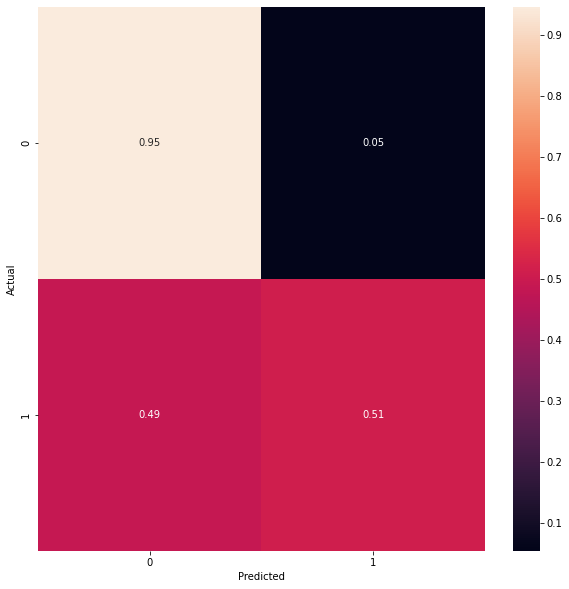

In [106]:
mlp = MLPClassifier(hidden_layer_sizes = (10), activation="tanh", solver="sgd", alpha = 0.1, learning_rate_init = 0.01, max_iter=2000)
mlp.fit(X_train,y_train)
predict_test = mlp.predict(X_test)
cm = metrics.confusion_matrix(y_test, predict_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [123]:
for val in train_accuracy_tanh:
    print(val.round(6))

0.853878
0.853973
0.852874
0.853954
0.846633
0.837286
